# <font color=#3A86FF>Données nutritionnelles - Exploration </font>

## Sommaire

* [Chargement des donnees](#Chargement-des-donnees)
* [ACP](#ACP)
    * [Préparation des données](#Preparation-des-donnees)
    * [Centrage et réduction](#Centrage-et-reduction)
    * [Calcul des composantes principales](#Calcul-des-composantes-principales)
    * [Eboulis des valeurs propres](#Eboulis-des-valeurs-propres)
    * [Cercle des corrélations](#Cercle-des-correlations)
    * [Projection des individus](#Projection-des-individus)    
* [Conclusion](#Conclusion) 
* [Reste à faire](#Reste-a-faire)

## <font color=#FB5607>Chargement des donnees</font>

In [131]:
import pandas as pd
import time

now = time.time()
df = pd.read_csv("products_clean.csv", encoding="utf-8",sep=",", low_memory=False)
time.time() - now

8.376682996749878

In [132]:
df.head()

,states_fr,serving_size,product_name,brands,states,creator,additives,main_category_fr,countries_fr,quantity,...,fat_100g,energy_100g,saturated-fat_100g,vitamin-a_100g,vitamin-c_100g,proteins_100g,sugars_100g,iron_100g,carbohydrates_100g,nutrition_grade_fr.1
0,"A compléter,Informations nutritionnelles à com...",NaN,Farine de blé noir,Ferme t'y R'nao,"en:to-be-completed, en:nutrition-facts-to-be-c...",openfoodfacts-contributors,NaN,NaN,France,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"A compléter,Informations nutritionnelles compl...",28 g (1 ONZ),Banana Chips Sweetened (Whole),NaN,"en:to-be-completed, en:nutrition-facts-complet...",usda-ndb-import,[ bananas -> en:bananas ] [ vegetable-oil -...,NaN,États-Unis,NaN,...,28.57,2243.0,28.57,0.0,0.0214,3.57,14.29,0.00129,64.29,d
2,"A compléter,Informations nutritionnelles compl...",28 g (0.25 cup),Peanuts,Torn & Glasser,"en:to-be-completed, en:nutrition-facts-complet...",usda-ndb-import,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,NaN,États-Unis,NaN,...,17.86,1941.0,0.00,0.0,0.0000,17.86,17.86,0.00129,60.71,b
3,"A compléter,Informations nutritionnelles compl...",28 g (0.25 cup),Organic Salted Nut Mix,Grizzlies,"en:to-be-completed, en:nutrition-facts-complet...",usda-ndb-import,[ organic-hazelnuts -> en:organic-hazelnuts ...,NaN,États-Unis,NaN,...,57.14,2540.0,5.36,NaN,NaN,17.86,3.57,0.00514,17.86,d
4,"A compléter,Informations nutritionnelles compl...",35 g (0.25 cup),Organic Polenta,Bob's Red Mill,"en:to-be-completed, en:nutrition-facts-complet...",usda-ndb-import,[ organic-polenta -> en:organic-polenta ] [...,NaN,États-Unis,NaN,...,1.43,1552.0,NaN,NaN,NaN,8.57,NaN,NaN,77.14,NaN


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 37 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   states_fr                320726 non-null  object 
 1   serving_size             211331 non-null  object 
 2   product_name             303010 non-null  object 
 3   brands                   292360 non-null  object 
 4   states                   320726 non-null  object 
 5   creator                  320770 non-null  object 
 6   additives                248905 non-null  object 
 7   main_category_fr         84366 non-null   object 
 8   countries_fr             320492 non-null  object 
 9   quantity                 104819 non-null  object 
 10  categories               84410 non-null   object 
 11  categories_fr            84411 non-null   object 
 12  nutrition_grade_fr       221210 non-null  object 
 13  countries                320492 non-null  object 
 14  addi

In [134]:
import numpy as np

# identification des colonnes numériques et qualitatives
colonnesNum=df.select_dtypes(np.number).columns.tolist()
colonnesQual=df.select_dtypes('O').columns.tolist()

## <font color=#FB5607>ACP</font>

### Preparation des donnees

In [135]:
# filtrage sur les variables quantitatives
dataPCA=df[colonnesNum].dropna()
nomsIndividus=df.iloc[dataPCA.index,2] # Individus
nutritionGrade=df.iloc[dataPCA.index,12] # note de nutrition par individu
variables=dataPCA.columns # Variables
X=dataPCA.values # Valeurs

In [136]:
dataPCA.sample(5)

,additives_n,nutrition-score-fr_100g,fiber_100g,calcium_100g,salt_100g,cholesterol_100g,fat_100g,energy_100g,saturated-fat_100g,vitamin-a_100g,vitamin-c_100g,proteins_100g,sugars_100g,iron_100g,carbohydrates_100g
92515,2.0,9.0,1.5,0.154,1.24968,0.015,10.77,1159.0,3.85,0.000139,0.0,10.77,3.08,0.00222,35.38
51130,2.0,-2.0,10.9,0.000,0.02286,0.000,1.82,1443.0,0.00,0.000000,0.0,9.09,20.00,0.02945,81.82
44009,1.0,5.0,2.9,0.015,0.57912,0.000,13.24,983.0,5.88,0.000000,0.0,2.21,7.35,0.00106,29.41
147906,7.0,13.0,0.0,1.250,0.00000,0.000,0.00,1305.0,0.00,0.000000,0.0,0.00,75.00,0.00000,75.00
173490,4.0,21.0,2.0,0.080,2.33680,0.000,20.00,1506.0,9.00,0.000000,0.0,6.00,6.00,0.00216,40.00


In [137]:
nutritionGrade

1         d
2         b
77        c
80        d
146       c
         ..
320664    c
320665    b
320738    d
320742    a
320768    b
Name: nutrition_grade_fr, Length: 128450, dtype: object

In [138]:
variables

Index(['additives_n', 'nutrition-score-fr_100g', 'fiber_100g', 'calcium_100g',
       'salt_100g', 'cholesterol_100g', 'fat_100g', 'energy_100g',
       'saturated-fat_100g', 'vitamin-a_100g', 'vitamin-c_100g',
       'proteins_100g', 'sugars_100g', 'iron_100g', 'carbohydrates_100g'],
      dtype='object')

In [139]:
nomsIndividus

1                            Banana Chips Sweetened (Whole)
2                                                   Peanuts
77                               Granola Cranberry And Acai
80                                      Peanuts, Mixed Nuts
146                                             Cranberries
                                ...                        
320664                      Chipotle Peppers In Adobo Sauce
320665                                          Dal Makhani
320738                                        Organic Z Bar
320742                                      Natural Cassava
320768    Mint Melange Tea A Blend Of Peppermint, Lemon ...
Name: product_name, Length: 128450, dtype: object

### Centrage et reduction

In [140]:
from sklearn import preprocessing
from sklearn import decomposition

In [141]:
centreReduit = preprocessing.StandardScaler().fit(X)
XCentreReduit = centreReduit.transform(X)
XCentreReduit.shape

(128450, 15)

In [142]:
X.shape

(128450, 15)

### Calcul des composantes principales

In [197]:
n_comp=15 # n_comp <= nombre de variables
pca = decomposition.PCA(n_components=n_comp)
pca.fit(XCentreReduit)

PCA(n_components=15)

### Eboulis des valeurs propres

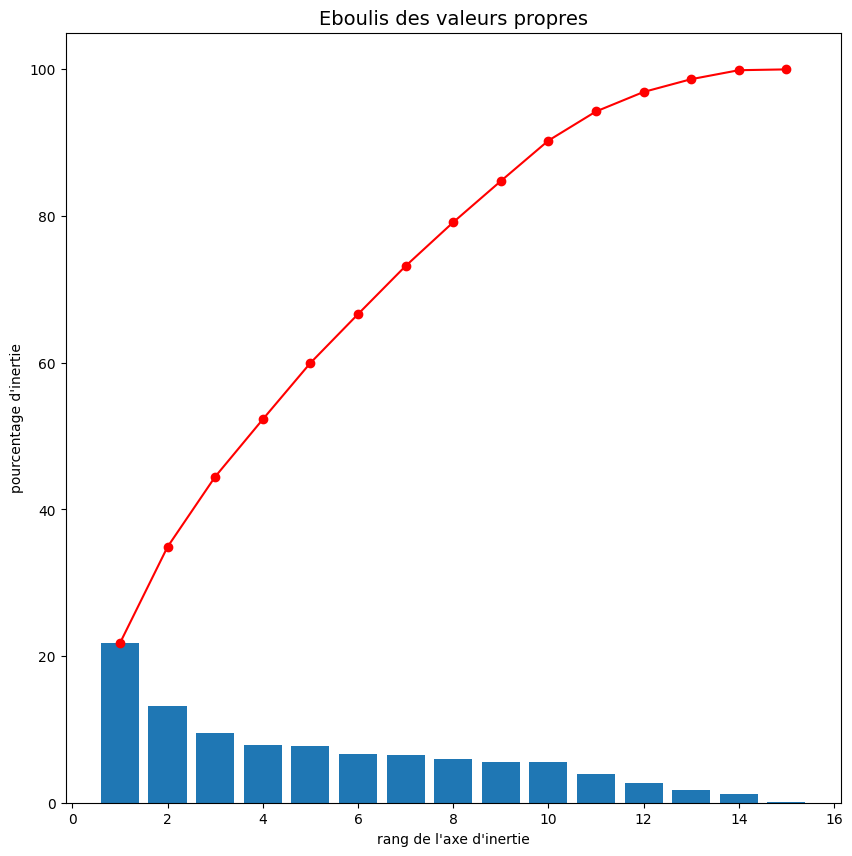

In [201]:
from matplotlib import pyplot as plt

plt.style.use('default')
# taille du schema
plt.rcParams["figure.figsize"] = (10,10)

vectVarianceExpliquee = pca.explained_variance_ratio_*100 # renvoie les variences expliquées pour chacune des dimensions
plt.bar(np.arange(len(vectVarianceExpliquee))+1, vectVarianceExpliquee)
plt.plot(np.arange(len(vectVarianceExpliquee))+1, vectVarianceExpliquee.cumsum(),c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres",fontsize=14,fontweight='normal')
plt.show()

In [199]:
composantesPrincipales = pca.components_ # triés par variance expliquée

In [200]:
# Selection des plans Factoriels
#dimension 1
d1=0
#dimension 2
d2=1

### Cercle des correlations

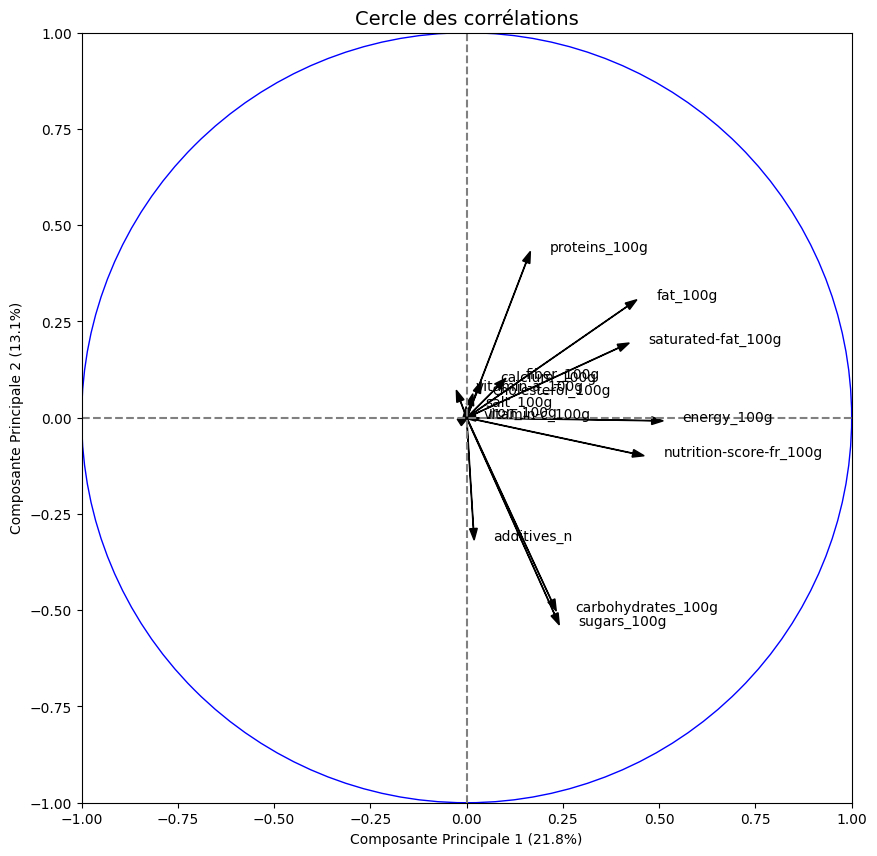

In [190]:
from matplotlib import pyplot as plt
import matplotlib as mpl

plt.style.use('default')
# taille du schema
plt.rcParams["figure.figsize"] = (10,10)

fig, ax = plt.subplots()

# configuration de la bordure
plt.xlim(-1,1)
plt.ylim(-1,1)

# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')

# libelles des axes
plt.xlabel('Composante Principale {} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
plt.ylabel('Composante Principale {} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))
plt.title('Cercle des corrélations',color="black",fontsize=14,fontweight='normal')
# afficher le cercle
cercle = plt.Circle((0,0),radius=1, color='b', fill=False)
ax.set_aspect(1)
ax.add_patch(cercle)


#placement des étiquettes des p variables + fleches (partant du centre vers les points projetés)
for i in range(len(variables)):
    plt.annotate(variables[i],xy =(composantesPrincipales[d1][i],composantesPrincipales[d2][i]),xytext =(composantesPrincipales[d1][i]+0.05,composantesPrincipales[d2][i])) 
    plt.arrow(0,0,composantesPrincipales[0][i],composantesPrincipales[1][i].astype(np.float),length_includes_head=True,head_width=0.02, head_length=0.03,color="black")

### Projection des individus

In [174]:
# Projection des individus sur les composantes principales
XProjete = pca.transform(XCentreReduit)
print(f"dim Projeté:{XProjete.shape}- dim Origine:{XCentreReduit.shape}")

dim Projeté:(128450, 15)- dim Origine:(128450, 15)


In [226]:
# preparation de la palette de couleur qui reprend les codes couleurs hexa du logo nutriscore
custom_palette = {
'd': '#E08530',#Orange
 'c': '#F6CB45',#Jaune
 'e': '#D44B29',#Rouge
 'a': '#387E47',#Vert foncé
 'b': '#91B849' #Vert   
}
custom_palette['a']

'#387E47'

In [223]:
list(custom_palette.values())

['#E08530', '#F6CB45', '#D44B29', '#387E47', '#91B849']

In [222]:
list(custom_palette.keys())

['d', 'c', 'e', 'a', 'b']

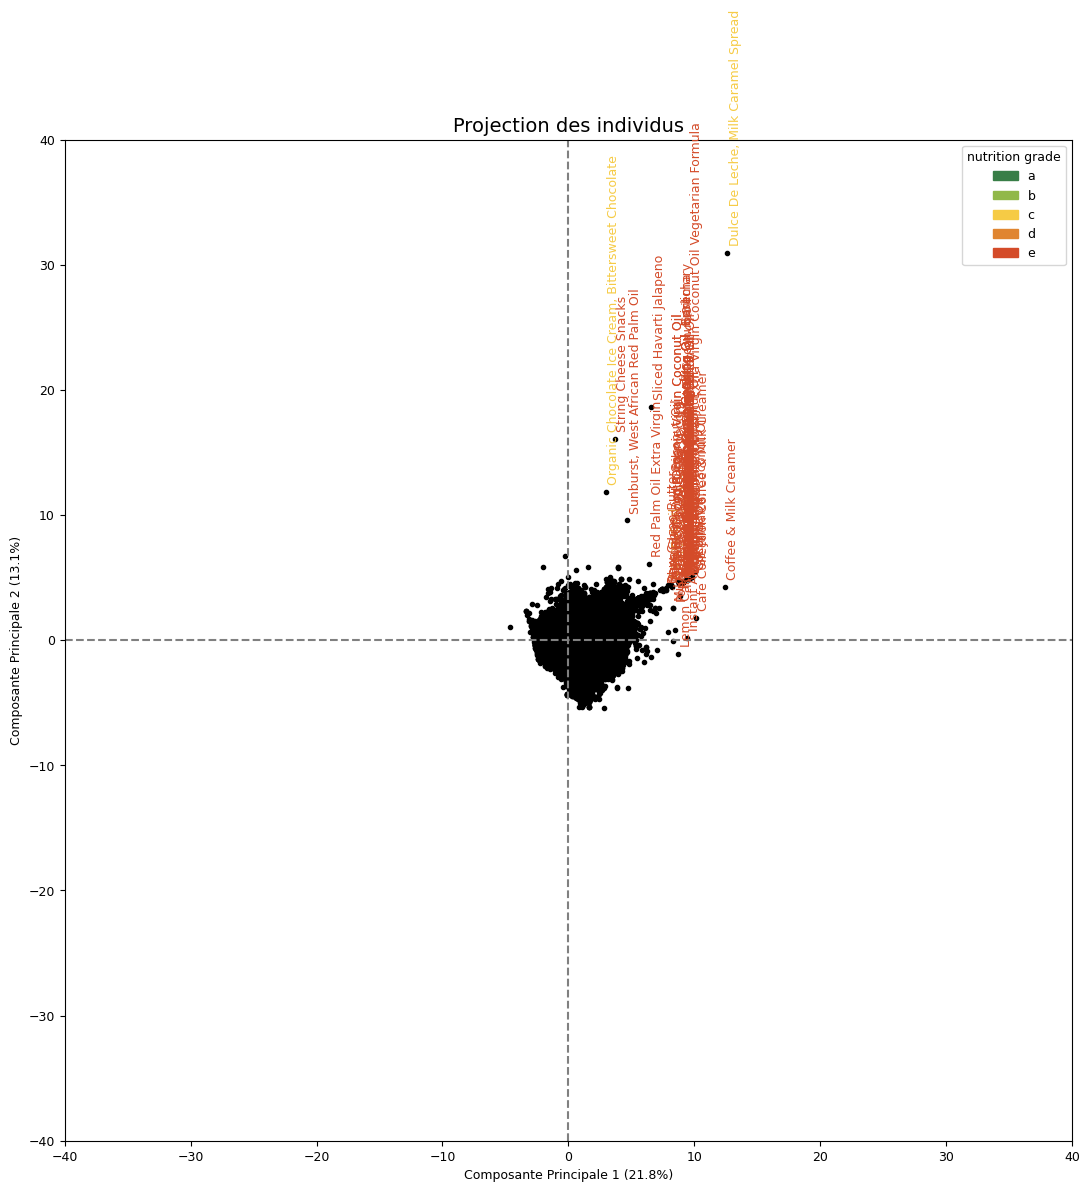

In [232]:
# visualisation
from matplotlib import pyplot as plt

# taille du graphique
plt.rcParams["figure.figsize"] = (13,13)
plt.rcParams['font.size'] = '9.0'

# configuration de la bordure
plt.xlim(-40,40)
plt.ylim(-40,40)

# affichage des lignes horizontales et verticales
plt.plot([-40, 40], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-40, 40], color='grey', ls='--')

plt.xlabel('Composante Principale {} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
plt.ylabel('Composante Principale {} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))
plt.title('Projection des individus',fontsize=14,fontweight='normal')

# representer le nuage projeté sur le 1er plan factoriel (composé des 2 premieres composantes principales 0 et 1)
plt.scatter(XProjete[:,d1],XProjete[:,d2],marker=".",color="black")

for i in range(len(nomsIndividus)):   # nombre d'individus
    
    p=np.array([XProjete[i,d1],XProjete[i,d2]])

    color=nutritionGrade.values[i]

    # on utilise la distance euclidienne pour n'afficher les labels que pour les individus loin du centre
    distance= np.linalg.norm(p-np.array([0,0]))
    if distance>8.7:
        plt.text(XProjete[i,d1]+0.1, XProjete[i,d2]+0.8, nomsIndividus.values[i],rotation=90,color=custom_palette[color]) 
    #plt.annotate(nomsIndividus.values[i],xy =(XProjete[i,0],XProjete[i,1]),xytext =(XProjete[i,0],XProjete[i,1]))

import matplotlib.patches as mpatches

a_patch = mpatches.Patch(color=custom_palette['a'], label='a')
b_patch = mpatches.Patch(color=custom_palette['b'], label='b')
c_patch = mpatches.Patch(color=custom_palette['c'], label='c')
d_patch = mpatches.Patch(color=custom_palette['d'], label='d')
e_patch = mpatches.Patch(color=custom_palette['e'], label='e')


plt.legend(title="nutrition grade",handles=[a_patch, b_patch, c_patch, d_patch, e_patch])

#import os
#os.system('say "jai fini de dessiner"')

Observations:
* sur l'axe du nutrition score, la note de nutrition ne semble pas correlee
* la composante energy / nutrition_score explique toute seule une composante
* sugars et carbohydrates (glucides) expliquent fortement l'axe vertical negatif
* le gras explique modéremment l'axe vertical positif en opposition avec les glucides/sucres

## <font color=#FB5607>Conclusion</font>

On peut distinguer 3 axes de definition d'un produit alimentaire:
* les aliments riches en protéines
* les aliments riches en sucre lent/rapide
* les aliments energetiques

## <font color=#FF006E>Reste a faire</font>